In [3]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# # Importing the training set
df = pd.read_csv('./GoogleStocks.csv')
df = df.sort_values(by='date')
op = np.array(df['open'])
volumes = np.array(df['volume'])
cp = np.array(df['close'])
hp = np.array(df['high'])
lp = np.array(df['low'])

ap = np.mean([hp, lp], axis=0)

df['varience'] = ap

df1 = df

X_adm_train,X_adm_test = train_test_split(df,shuffle=False)

X_train = X_adm_train[['volume','varience']]
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
# print(X_train)

sc_t = MinMaxScaler(feature_range = (0, 1))
o_vals = X_adm_train[['open']]
y_train = sc_t.fit_transform(o_vals)

# print(y_train)
real_stock_prices = X_adm_test['open']
print(X_train[0:10,0:2])

[[0.14111637 0.13281331]
 [0.2522322  0.13723045]
 [0.23006657 0.16714389]
 [0.21830904 0.15265136]
 [0.19200093 0.14830263]
 [0.11033637 0.15601308]
 [0.10970877 0.1393413 ]
 [0.09517888 0.14288869]
 [0.16911569 0.14433492]
 [0.13909372 0.1421069 ]]


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [5]:
#l , l1 test
l = 0
def RNN1(num_hidden_layers,num_cells,num_ts):
    l1 = l + 1
    # Initialising the RNN
    
    ##################training data###############################
    X_train1 = []
    y_train1 = []
    for i in range(num_ts, X_train.shape[0]):
        l1 = l1 + 1
        X_train1.append(X_train[i-num_ts:i,0:2])
        y_train1.append(y_train[i])
    X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
    X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1]*2, 1))
#     print(X_train1.shape, y_train1.shape)
    ##############################################################
    
    ###################RNN########################################
    model = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    model.add(LSTM(units = num_cells, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
    model.add(Dropout(0.2))
    # Adding a second LSTM layer and some Dropout regularisation
    if(num_hidden_layers==3):
        model.add(LSTM(units = num_cells, return_sequences = True))
        model.add(Dropout(0.2))
    else:
        model.add(LSTM(units = num_cells))
        model.add(Dropout(0.2))
    # Adding a third LSTM layer and some Dropout regularisation
    if(num_hidden_layers==3):
        model.add(LSTM(units = num_cells))
        model.add(Dropout(0.2))


    # Adding the output layer
    model.add(Dense(units = 1))

    # Compiling the RNN
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    model.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

    ###############testingdata############################
    af = df1[['volume','varience']]
    sc1 = MinMaxScaler(feature_range = (0, 1))
    XY = sc1.fit_transform(af)
    inputs = XY[len(df1) - len(X_adm_test) - num_ts:]
    print(inputs)
    X_test1 = []
    l2 = 0
    for i in range(num_ts, len(X_adm_test)+num_ts):
        l2 = l2 + 1
        X_test1.append(inputs[i-num_ts:i])
    X_test1 = np.array(X_test1)
    print(X_test1)
    # print(X_test.shape)

    X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1]*2, 1))
    predicted_stock_price = model.predict(X_test1)
    predicted_stock_price = sc_t.inverse_transform(predicted_stock_price)
    print(predicted_stock_price)
    plt.plot(real_stock_prices, color = 'black', label = 'Price of Google stock')
    plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
    plt.title('Prediction of Google Stock')
    plt.ylabel('Prediction of Google Stock Price')
    plt.xlabel('Time')
    plt.legend()
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
491/491 [==============================] - 14s 28ms/step - loss: 0.0887
Epoch 2/100
491/491 [==============================] - 11s 22ms/step - loss: 0.0218
Epoch 3/100
491/491 [==============================] - 10s 21ms/step - loss: 0.0153
Epoch 4/100
491/491 [==============================] - 10s 21ms/step - loss: 0.0125
Epoch 5/100
491/491 [==============================] - 10s 21ms/step - loss: 0.0111
Epoch 6/100
491/491 [==============================] - 10s 21ms/step - loss: 0.0120
Epoch 7/100
491/491 [==============================] - 10s 21ms/step - loss: 0.0118
Epoch 8/100
491/491 [==============================] - 7s 13ms/step - loss: 0.0106
Epoch 9/100
491/491 [==============================] - 7s 15ms/step - loss: 0.0100
Epoch 10/10

491/491 [==============================] - 5s 11ms/step - loss: 0.0052
Epoch 88/100
491/491 [==============================] - 6s 11ms/step - loss: 0.0046
Epoch 89/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0051
Epoch 90/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0073
Epoch 91/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0063
Epoch 92/100
491/491 [==============================] - 6s 13ms/step - loss: 0.0044
Epoch 93/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0043
Epoch 94/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0044
Epoch 95/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0047
Epoch 96/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0041
Epoch 97/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0039
Epoch 98/100
491/491 [==============================] - 6s 12ms/step - loss: 0.0049
Epoch

[[1077.4703 ]
 [1064.6382 ]
 [1057.504  ]
 [1050.8611 ]
 [1045.3752 ]
 [1050.4039 ]
 [1047.7745 ]
 [1049.2732 ]
 [1051.4537 ]
 [1057.1752 ]
 [1066.669  ]
 [1072.6896 ]
 [1074.9628 ]
 [1083.5562 ]
 [1094.1416 ]
 [1097.3798 ]
 [1099.422  ]
 [1105.4656 ]
 [1105.048  ]
 [1105.1125 ]
 [1102.3983 ]
 [1122.0156 ]
 [1132.2467 ]
 [1135.8585 ]
 [1134.2606 ]
 [1120.4023 ]
 [1115.6202 ]
 [1119.8207 ]
 [1121.927  ]
 [1130.8445 ]
 [1136.1411 ]
 [1150.1122 ]
 [1158.     ]
 [1167.3932 ]
 [1163.3441 ]
 [1164.9413 ]
 [1159.0203 ]
 [1145.0094 ]
 [1136.1062 ]
 [1122.4888 ]
 [1122.5869 ]
 [1125.4644 ]
 [1127.3643 ]
 [1133.0455 ]
 [1136.8875 ]
 [1148.6696 ]
 [1152.5365 ]
 [1157.9294 ]
 [1158.6069 ]
 [1144.5751 ]
 [1125.5125 ]
 [1103.2593 ]
 [1088.1769 ]
 [1082.4448 ]
 [1083.5916 ]
 [1087.0958 ]
 [1091.0732 ]
 [1094.4603 ]
 [1098.7233 ]
 [1095.9165 ]
 [1095.3949 ]
 [1093.1785 ]
 [1100.2427 ]
 [1092.8191 ]
 [1088.1348 ]
 [1090.5785 ]
 [1095.172  ]
 [1102.9949 ]
 [1105.7405 ]
 [1112.931  ]
 [1113.7351 ]
 [1116

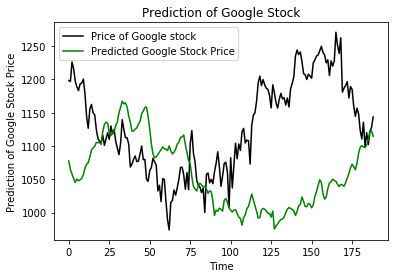

In [6]:
predicted_stock_price = RNN1(3,80,75)

In [ ]:
predicted_stock_price = RNN1(2,80,75)

In [ ]:
predicted_stock_price = RNN1(2,50,75)